In [19]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
data = pd.read_csv('amazon_alexa.csv')
# print(data.head())
data[data['rating']==5]


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
...,...,...,...,...,...
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [35]:
#1,2,3->negative(i.e 0)
data.loc[data['rating']<=3,'sentiment'] = 0

#4,5->positive(i.e 1)
data.loc[data['rating']>3,'sentiment'] = 1


In [36]:
data[data['rating']==3]

,rating,date,variation,verified_reviews,feedback,sentiment
6,3,31-Jul-18,Sandstone Fabric,"Without cellphone, I cannot use many features....",1,0.0
24,3,30-Jul-18,Sandstone Fabric,"I got second unit bedroom, I expecting sounds ...",1,0.0
33,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good small setup pre...,1,0.0
49,3,30-Jul-18,Charcoal Fabric,No different Apple. To play specific list musi...,1,0.0
54,3,30-Jul-18,Sandstone Fabric,like google better,1,0.0
...,...,...,...,...,...,...
3059,3,30-Jul-18,White Dot,Works well. Just disappointed speaker quality....,1,0.0
3068,3,30-Jul-18,White Dot,I hoping cord white also. Otherwise fine.,1,0.0
3114,3,30-Jul-18,Black Dot,,1,0.0
3122,3,30-Jul-18,Black Dot,I dislike confuses requests time.,1,0.0


In [37]:
stp_words=stopwords.words('english')
def clean_review(review):
    cleanreview=" ".join(word for word in review.split() if word not in stp_words)
    return cleanreview

data['verified_reviews']=data['verified_reviews'].apply(clean_review)
# xy=data['verified_reviews'].to_string(index=False)
# print(clean_review(xy))

In [38]:
print(data['verified_reviews'])


0                                              Love Echo!
1                                               Loved it!
2       Sometimes playing game, answer question correc...
3       I lot fun thing. My 4 yr old learns dinosaurs,...
4                                                   Music
                              ...                        
3145              Perfect kids, adults everyone between!!
3146    Listening music, searching locations, checking...
3147    I love things, running entire home, TV, lights...
3148    Only complaint I sound quality great. I mostly...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object


In [39]:
data['rating'].value_counts()


5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

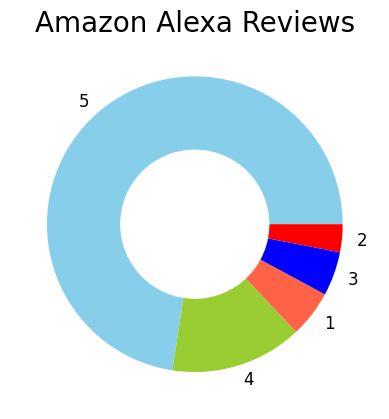

In [40]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
custom_colors = ["skyblue", "yellowgreen", "tomato", "blue", "red"]
plt.pie(quantity, labels=numbers,colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews", fontsize=20)
plt.show()
plt.show()
#print(quantity)

<Axes: xlabel='variation', ylabel='count'>

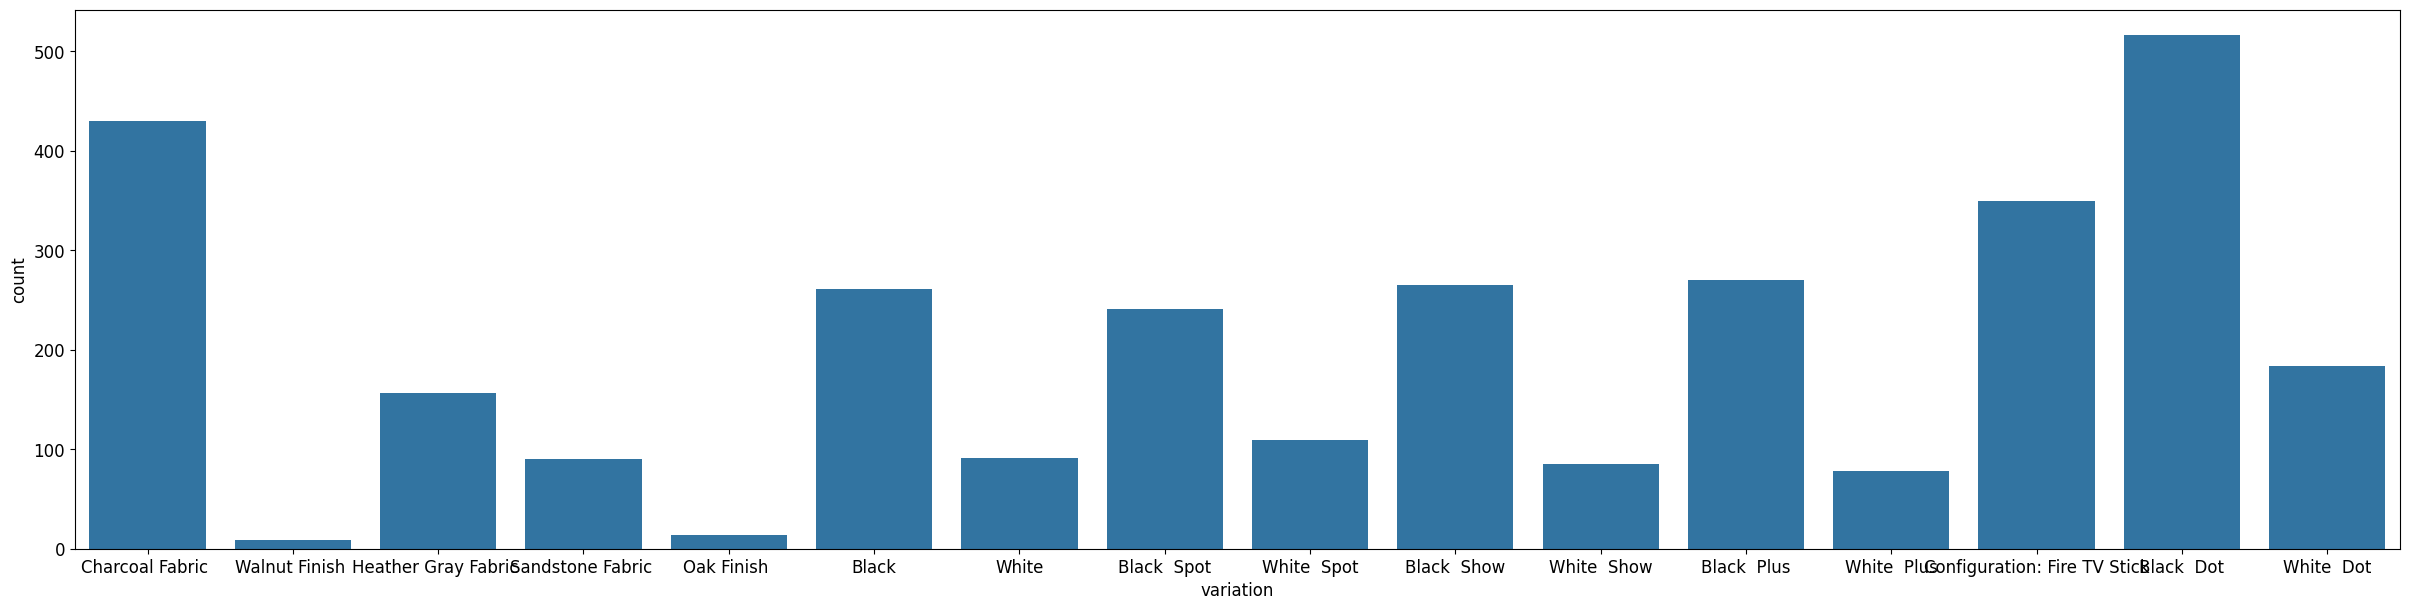

In [42]:
fig = plt.figure(figsize=(30,7))
sns.countplot(x="variation",data=data)

In [43]:
consolidated=' '.join(word for word in data['verified_reviews'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


KeyError: 'Sentiment'

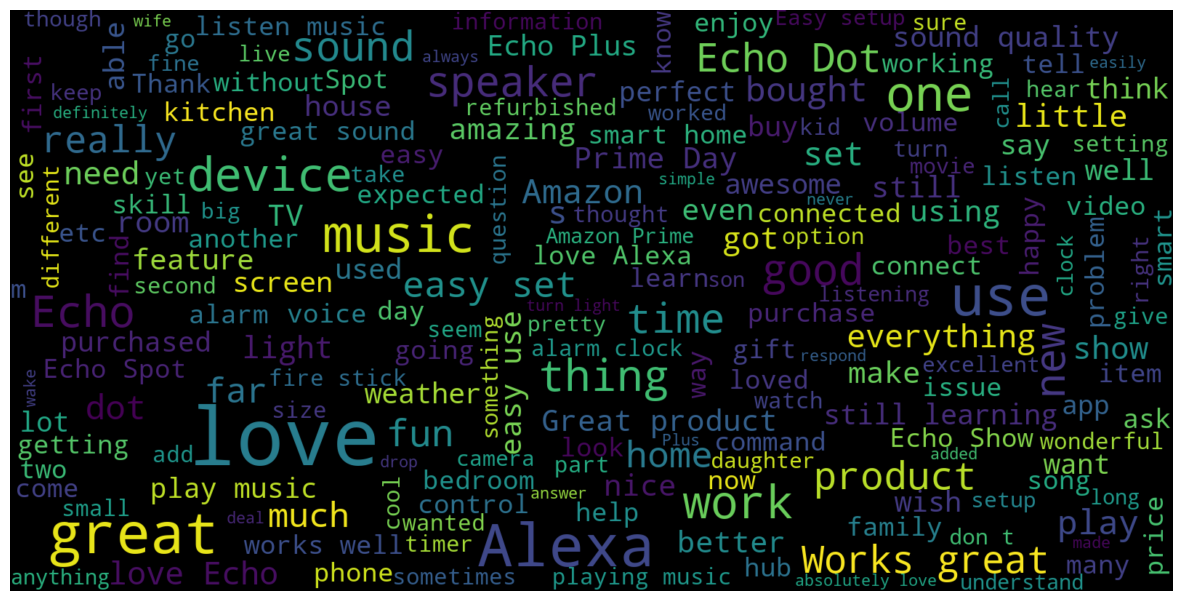

In [44]:
consolidated=' '.join(word for word in data['verified_reviews'][data['sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


In [45]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['verified_reviews'] ).toarray()


In [47]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['sentiment'],
												test_size=0.25 ,
												random_state=42)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print('Accuracy Score in Logistic Regression Algorithm : {}'.format(accuracy_score(y_test,pred)*100))


Accuracy Score in Logistic Regression Algorithm : 86.6751269035533


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
prediction=rfc.predict(x_test)

In [53]:
print('Accuracy Score in Random Forest Algorithm : {}'.format(accuracy_score(y_test,prediction)*100))

Accuracy Score in Random Forest Algorithm : 90.73604060913706


In [55]:
# Input review
input_review = "Too difficult to set up.  It keeps timing out before you can enter the password"

# Clean and preprocess the input review
cleaned_review = clean_review(input_review)

# Vectorize the input review using the same TF-IDF vectorizer
input_vector = cv.transform([cleaned_review])

# Use the trained model to predict sentiment
predicted_sentiment = rfc.predict(input_vector)

# Map the predicted sentiment to a human-readable label
#if predicted_sentiment ==1:
    #sentiment_label='Positive'
#else :
#    sentiment_label='Negative'
sentiment_label = "Positive" if predicted_sentiment == 1 else "Negative"

# Print the result
print(f"The sentiment of the review is: {sentiment_label}")

The sentiment of the review is: Negative
